# Assignment Notebook:  Feature Engineering with Python - Independent Project

## Question 1


```


In [3]:
# Check the data shape
# ---
# 
import pandas as pd

data = pd.read_csv('https://bit.ly/3deaKEM')

print(data.shape)


(21201, 29)


In [4]:
#Check the first five data sample
import pandas as pd

data = pd.read_csv('https://bit.ly/3deaKEM')


print(data.head())

         Order No       User Id Vehicle Type  Platform Type  \
0   Order_No_4211   User_Id_633         Bike              3   
1  Order_No_25375  User_Id_2285         Bike              3   
2   Order_No_1899   User_Id_265         Bike              3   
3   Order_No_9336  User_Id_1402         Bike              3   
4  Order_No_27883  User_Id_1737         Bike              1   

  Personal or Business  Placement - Day of Month  \
0             Business                         9   
1             Personal                        12   
2             Business                        30   
3             Business                        15   
4             Personal                        13   

   Placement - Weekday (Mo = 1) Placement - Time  Confirmation - Day of Month  \
0                             5       9:35:46 AM                            9   
1                             5      11:16:16 AM                           12   
2                             2      12:39:25 PM                 

In [ ]:
#Check data types
data.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [ ]:
data.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# < modify data to avoid dummy traps >
#drop NA values
data.dropna(inplace=True)
data_ohe=pd.get_dummies(data)
target = data_ohe['Time from Pickup to Arrival']
features = data_ohe.drop(['Time from Pickup to Arrival'], axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

numeric=['Platform Type','Placement - Day of Month','Placement - Weekday (Mo = 1)',
'Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month',
'Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month','Pickup - Weekday (Mo = 1)',
'Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)',
'Distance (KM)','Temperature',
'Precipitation in millimeters','Pickup Lat','Pickup Long','Destination Lat',
'Destination Long' ]

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
# < transform validation set >

print(features_train.shape)
print(features_valid.shape)


(414, 3885)
(138, 3885)


In [7]:
from sklearn.svm import SVR 
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  


svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(features_train, target_train)
knn_regressor.fit(features_train, target_train)
dec_regressor.fit(features_train, target_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(features_valid)
knn_y_pred = knn_regressor.predict(features_valid)
dec_y_pred = dec_regressor.predict(features_valid)

# Finally, evaluate our model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(target_valid, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(target_valid, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(target_valid, dec_y_pred)))

SVM RMSE: 1016.4583027412627
KNN RMSE: 1106.312127642157
Decision Tree RMSE: 1353.4565652111055


In [8]:

from sklearn.svm import SVR 
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  
# Splitting our dataset  
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

# Performing normalisation 
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(features_train) 
X_train = norm.transform(features_train) 
features_valid = norm.transform(features_valid)

# Fitting in our models  
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(features_train, target_train)
knn_regressor.fit(features_train, target_train)
dec_regressor.fit(features_train, target_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(features_valid)
knn_y_pred = knn_regressor.predict(features_valid)
dec_y_pred = dec_regressor.predict(features_valid)

# Finally, evaluating our models 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(target_valid, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(target_valid, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(target_valid, dec_y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"


SVM RMSE: 1030.0606096004235
KNN RMSE: 1069.1548032597211
Decision Tree RMSE: 1991.007000693768


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [9]:
# First we check for modeling with standardisation
# ---


# Splitting our dataset  
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

# Performing standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(features_train)
X_test = sc.fit_transform(features_valid)

# Fitting in our models  
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, target_train)
knn_regressor.fit(X_train, target_train)
dec_regressor.fit(X_train, target_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(target_valid, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(target_valid, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(target_valid, dec_y_pred)))

SVM RMSE: 1030.6499729554212
KNN RMSE: 1026.2610500737865
Decision Tree RMSE: 871.6393807905466


## Feature Selection Techniques

In [10]:
# Using already imported 
# Describing our dataset
# ---
# 
data.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,2.724638,13.990942,2.817029,13.990942,2.817029,13.990942,2.817029,13.990942,2.817029,13.990942,2.817029,9.802536,18.686232,7.905797,-1.282901,36.812163,-1.284149,36.809267,1585.981884
std,0.640645,9.311211,1.380786,9.311211,1.380786,9.311211,1.380786,9.311211,1.380786,9.311211,1.380786,5.664145,2.431066,17.089971,0.029854,0.037043,0.035022,0.043530,950.420039
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.200000,0.100000,-1.413547,36.674733,-1.395859,36.653828,2.000000
25%,3.000000,5.000000,2.000000,5.000000,2.000000,5.000000,2.000000,5.000000,2.000000,5.000000,2.000000,5.750000,16.875000,1.075000,-1.304033,36.786611,-1.303682,36.784567,919.250000
50%,3.000000,11.000000,3.000000,11.000000,3.000000,11.000000,3.000000,11.000000,3.000000,11.000000,3.000000,9.000000,18.200000,2.900000,-1.283658,36.807068,-1.286123,36.806290,1408.500000
75%,3.000000,22.000000,4.000000,22.000000,4.000000,22.000000,4.000000,22.000000,4.000000,22.000000,4.000000,13.000000,19.700000,4.900000,-1.258414,36.830370,-1.261335,36.829555,2045.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,35.000000,24.000000,99.100000,-1.177202,36.955076,-1.114049,37.012030,5434.000000


In [11]:
# I select and perform modeling with both standardisation and normalisation.
# I will use this as as our base for our solution, then perform feature engineering 
# by filter methods.
# ---

# I select our features
from sklearn.svm import SVR 
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  
# Splitting our dataset  
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

# Performing normalisation 
norm = MinMaxScaler().fit(features_train) 
features_train = norm.transform(features_train) 
features_valid = norm.transform(features_valid)

# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(features_train, target_train)
knn_regressor.fit(features_train, target_train)
dec_regressor.fit(features_train, target_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(features_valid)
knn_y_pred = knn_regressor.predict(features_valid)
dec_y_pred = dec_regressor.predict(features_valid)

# Finally, evaluating our models  
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(target_valid, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(target_valid, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(target_valid, dec_y_pred)))


SVM RMSE: 1027.8090645284512
KNN RMSE: 999.4119201245082
Decision Tree RMSE: 862.4966750618541


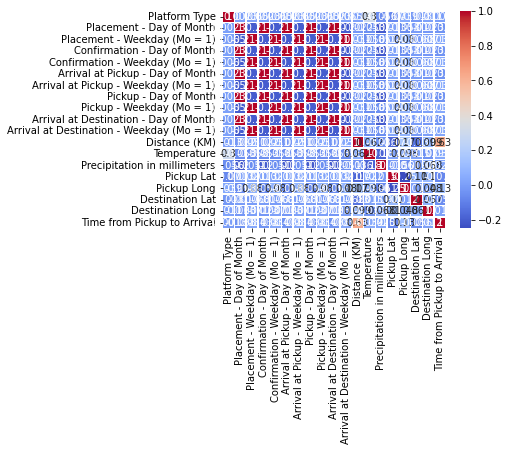

In [12]:
# Then appply filter methods by plotting a correlation matrix
# ---
import matplotlib.pyplot as plt
df_corr = data.corr()
plt.figure(figsize=(5,4))

# We then plot our heatmap visualistion
# 
import seaborn as sns
sns.heatmap(df_corr, annot=True, linewidth=0.5, cmap='coolwarm');

In [13]:
# Then perform our modeling, comparing the resulting accuracy to the previous base solution.
# ---


# Splitting our dataset  
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

# Performing normalisation 
norm = MinMaxScaler().fit(features_train) 
X_train = norm.transform(features_train) 
X_test = norm.transform(features_valid)

# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, target_train)
knn_regressor.fit(X_train, target_train)
dec_regressor.fit(X_train, target_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(target_valid, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(target_valid, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(target_valid, dec_y_pred)))

SVM RMSE: 1027.8090645284512
KNN RMSE: 999.4119201245082
Decision Tree RMSE: 862.4966750618541


#### Wrapper Method: <font color="blue"> Step Forward Feature Selection</font>

In [14]:
# importing six and sys
import six
import sys
sys.modules['sklearn.externals.six'] = six

# installing mlrose
!pip install mlrose
import mlrose

# importing joblib
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=45e5e3fb51a50abb9d6d6e2410e1d98419f514de9f925f33451bfebeb698f9ea
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [17]:
# Performing normalisation 
norm = MinMaxScaler().fit(features_train) 
X_train = norm.transform(features_train) 
X_test = norm.transform(features_valid)
# Selecting the ML algorithm to use   
dec_regressor = DecisionTreeRegressor(random_state=27)

# We pass the svm_regressor the estimator to the SequentialFeatureSelector function. 
# The k_features specifies the number of features to select. 
# We can set any number of features here. The forward parameter, if set to True, 
# performs step forward feature selection. The verbose parameter is used for logging 
# the progress of the feature selector, the scoring parameter defines the performance 
# evaluation criteria and finally, cv refers to cross-validation folds.
# ---
# Hint: Hover cursor on SequentialFeatureSelector to get a list of more parameter values.
# ---
#
from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(dec_regressor,
           k_features=4,
           forward=True,
           verbose=2,
           scoring='r2',
           cv=4)
 
# Perform step forward feature selection
feature_selector = feature_selector.fit(features_train, features_valid) 

In [ ]:
# Which are the selected features?
# The columns at these indexes are those which were selected
# ---
#
feat_cols = list(feature_selector.k_feature_idx_)
print(feat_cols)

In [19]:
# We can now use those features to build a full model
# ---
# 

# Without step backward feature selection (sbfs)
from sklearn.model_selection import train_test_split

data.dropna(inplace=True)
data_ohe=pd.get_dummies(data)
target = data_ohe['Time from Pickup to Arrival']
features = data_ohe.drop(['Time from Pickup to Arrival'], axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)
dec_regressor = DecisionTreeRegressor(random_state=27)
dec_regressor.fit(X_train, target_train)

# With step backward feature selection
dec_regressor2 = DecisionTreeRegressor(random_state=27)
dec_regressor2.fit(X_train[:, feat_cols], target_train)

# Making Predictions and determining the accuracies  
y_test_pred = dec_regressor.predict(X_test)
print('Decision Tree RMSE Without sbfs:', np.sqrt(metrics.mean_squared_error(target_valid, y_test_pred)))

y_test_pred2 = dec_regressor2.predict(X_test[:, feat_cols])
print('Decision Tree RMSE with sbfs:', np.sqrt(metrics.mean_squared_error(target_valid, y_test_pred2)))

NameError: ignored

                     #2.Wrapper Method: Recursive Feature Elimination

In [20]:
# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Fitting in our models   

svm_regressor = SVR(kernel="linear")   
dec_regressor = DecisionTreeRegressor(random_state=27)

# We want to select the best 2 features for our model. 
# NB: n_features_to_select will include the response variable
# ---
#  
from sklearn.feature_selection import RFE
svm_regressor = RFE(svm_regressor, n_features_to_select = 3, step=1)
dec_regressor = RFE(dec_regressor, n_features_to_select = 3, step=1)

svm_regressor.fit(X_train, target_train) 
dec_regressor.fit(X_train, target_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test) 
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model  
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(target_valid, svm_y_pred))) 
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(target_valid, dec_y_pred)))
 
# Displaying our best features
print('SVM Selected features: %s' % list(X.columns[svm_regressor.support_]))
print('Decision Tree Selected features: %s' % list(X.columns[dec_regressor.support_]))

KeyboardInterrupt: ignored